In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 파일 경로를 각자 컴퓨터 환경에 맞게 수정하세요!
file_path = '/content/drive/MyDrive/부리부리데마왕/dataset/'

## 1. 라이브러리

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture

from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples

In [5]:
# 파일 경로를 각자 컴퓨터 환경에 맞게 수정하세요!
file_path = '/content/drive/MyDrive/부리부리데마왕/dataset/'

## 2. PCA에 앞서 클러스터링을 진행하기 위한 데이터 호출

In [6]:
Train = pd.read_csv(file_path +'creditcard_data.csv')
drop_data = ['Amount', 'Time', 'Class']

train = Train.drop(columns = drop_data,axis=1)
target = Train['Class'].values

## 3. 모델

### K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

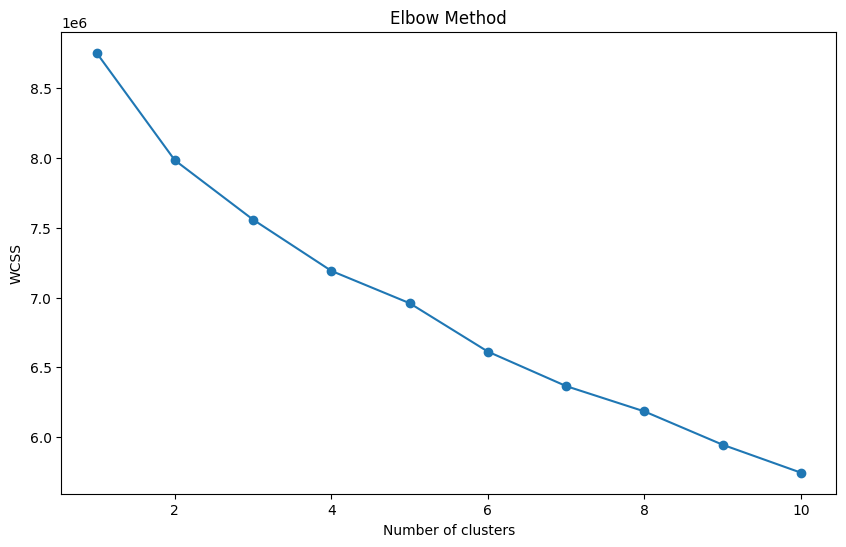

In [8]:
# Removing the 'Class' column for clustering
clustering_data = train.copy()

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Square
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [12]:
kmeans_creditcard = KMeans(n_clusters=5, random_state=0)
kmeans_creditcard.fit(clustering_data)

# 클러스터링 결과 가져오기
y_kmeans_creditcard = kmeans_creditcard.predict(clustering_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
from sklearn.decomposition import PCA
import pandas as pd

feature_groups = [['V1', 'Cluster'], ['V2', 'Cluster'], ['V3', 'Cluster'],
           ['V4', 'Cluster'], ['V5', 'Cluster'], ['V6', 'Cluster'], ['V7', 'Cluster'],
           ['V8', 'Cluster'], ['V9', 'Cluster'], ['V10', 'Cluster'], ['V11', 'Cluster'],
           ['V12', 'Cluster'], ['V13', 'Cluster'], ['V14', 'Cluster'], ['V15', 'Cluster'],
           ['V16', 'Cluster'], ['V17', 'Cluster'], ['V18', 'Cluster'], ['V19', 'Cluster'],
           ['V20', 'Cluster'], ['V21', 'Cluster'], ['V22', 'Cluster'], ['V23', 'Cluster'],
           ['V24', 'Cluster'], ['V25', 'Cluster'], ['V26', 'Cluster'], ['V27', 'Cluster'],
           ['V28', 'Cluster']]

pca_data1 = []
pca_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

for i,group in enumerate(feature_groups):
    # 데이터 선택
    selected_data_X = clustering_data[group]

    # PCA
    pca = PCA(n_components=1)
    selected_data_X_pca = pca.fit_transform(selected_data_X)

    # PCA 적용 후 데이터를 데이터프레임에 추가
    pca_data1.append(pd.DataFrame(selected_data_X_pca, columns=[pca_columns[i]]))


# 각 그룹의 PCA 결과 데이터를 수평으로 연결하여 하나의 변수로 합침
merged_data_df = pd.concat(pca_data1, axis=1)

# Result 확인
merged_data_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.286478,-1.530436,-2.852483,-1.480494,-1.754829,1.902396,1.889078,-1.886128,-1.829936,1.855851,...,-1.899419,-1.889407,-1.885275,-1.895055,-1.886321,-1.885390,-1.874215,-1.886408,-1.886501,-1.885623
1,-2.323395,1.613871,1.791369,2.159168,2.042038,-2.115913,-2.073394,2.113892,2.069696,-2.071992,...,2.118270,2.115134,2.117149,2.137510,2.114880,2.112849,2.120588,2.114780,2.114324,2.114259
2,2.285429,-0.829156,-2.495814,-1.730505,-1.716385,1.954952,2.019049,-1.886818,-2.050484,1.839969,...,-1.800206,-1.893704,-1.888849,-1.914227,-1.880186,-1.888597,-1.902272,-1.886214,-1.885301,-1.885514
3,2.002345,-1.468217,-2.505061,-2.041792,-1.831311,1.933221,1.888610,-1.887420,-2.035499,1.875660,...,-1.838510,-1.882190,-1.884068,-1.884474,-1.886801,-1.890660,-1.842306,-1.886535,-1.886051,-1.885857
4,2.140941,-2.056387,-2.390893,-1.724682,-1.738770,1.888003,1.972295,-1.884417,-1.776637,1.765833,...,-1.914287,-1.891875,-1.885394,-1.915260,-1.886483,-1.885074,-1.894791,-1.883734,-1.887046,-1.886292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,1.217827,-2.085862,-1.411876,-2.012194,-2.097267,1.874967,2.024056,-1.886204,-1.896607,1.957548,...,-1.889182,-1.885469,-1.881305,-1.852881,-1.885354,-1.885238,-1.908928,-1.885197,-1.887037,-1.885878
284802,9.190981,-6.310768,3.813495,-1.374998,0.389544,0.782620,-0.297523,-0.919538,-0.654791,0.285380,...,-0.859661,-0.908762,-0.888475,-0.889366,-0.879572,-0.887843,-0.795647,-0.884717,-0.891667,-0.888018
284803,1.833770,-1.540231,-2.618182,-2.010565,-2.036157,1.925806,1.838380,-1.887037,-1.803986,2.000840,...,-1.826864,-1.886394,-1.888395,-1.920155,-1.885582,-1.889984,-1.919430,-1.887205,-1.886087,-1.885532
284804,-1.465016,0.261909,1.619845,-0.029023,-0.502193,0.004835,-0.180999,0.111025,0.164294,-0.047356,...,0.135714,0.114273,0.111185,0.091775,0.114082,0.117024,0.130437,0.113971,0.114279,0.114384


In [39]:
merged_data_df.to_csv(file_path + 'pca_train.csv', index=False, encoding='utf-8')